In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv('final.csv')
df.isnull().sum()

coin_id               0
timestamp             0
Market Cap            0
low                   0
high                  0
open                  0
close                 0
volume                0
3m_yield              0
2yr_yield             0
5yr_yield             0
7yr_yield             0
10yr_yield            0
30yr_yield            0
federal_funds_rate    0
dtype: int64

In [6]:
# Group by 'coin_id' and calculate descriptive statistics
grouped_stats = df.groupby('coin_id').agg(['mean', 'median', 'std', 'min', 'max'])

# Flatten MultiIndex columns
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]

# Reset index to make 'coin_id' a column
grouped_stats.reset_index(inplace=True)

# Save to CSV
grouped_stats.to_csv('crypto_stats.csv', index=False)

grouped_stats

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_74400/1211852033.py:2: FutureWarning: ['timestamp'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_stats = df.groupby('coin_id').agg(['mean', 'median', 'std', 'min', 'max'])


coin_id  Market Cap_mean  Market Cap_median  Market Cap_std  \
0     aave     2.287694e+09       1.366421e+09    1.597016e+09   
1     algo     3.385033e+09       2.291341e+09    3.137103e+09   
2     atom     4.551543e+09       3.460357e+09    2.552190e+09   
3      btc     6.575323e+11       5.936272e+11    2.353570e+11   
4      dai     5.638062e+09       5.256048e+09    2.012339e+09   
5      etc     3.951739e+09       3.107819e+09    2.258531e+09   
6      eth     2.600310e+11       2.224875e+11    1.037790e+11   
7      fil     3.431100e+09       2.202023e+09    2.577722e+09   
8      knc     2.460426e+08       1.399245e+08    3.467267e+08   
9     link     6.901294e+09       4.478996e+09    4.162035e+09   
10     snx     1.203830e+09       8.738136e+08    7.615468e+08   
11     uma     4.495367e+08       2.054013e+08    4.231967e+08   
12     uni     6.671586e+09       4.634742e+09    4.553952e+09   
13    wbtc     6.928520e+09       5.654699e+09    3.156135e+09   
14     yfi     6.651392e+08       3.383083e+08    5.200912e+08   
15     zec     1.074300e+09       8.947265e+08    7.192676e+08   
16     zrx     4.729281e+08       3.091984e+08    3.861361e+08   

    Market Cap_min  Market Cap_max      low_mean    low_median       low_std  \
0     6.843620e+08    7.953335e+09    163.261616     93.360000    119.581734   
1     3.182025e+08    1.339709e+10      0.632156      0.363000      0.527483   
2     1.289336e+09    1.245158e+10     15.433788     11.680000      8.486343   
3     3.019638e+11    1.278798e+12  33595.533069  30066.950000  12231.659810   
4     1.184381e+09    9.951881e+09      0.998973      0.999500      0.004885   
5     6.628477e+08    1.716463e+10     28.258943     21.530000     16.302752   
6     8.329408e+10    5.716658e+11   2109.697847   1823.210000    846.705906   
7     9.336518e+08    1.230658e+10     27.814102      7.628000     35.456509   
8     1.908901e+07    2.099791e+09      1.406060      1.317000      0.841476   
9     2.644424e+09    2.203740e+10     14.274649      8.803000      9.249946   
10    3.440799e+08    3.921509e+09      6.016805      2.955000      5.336684   
11    9.318426e+07    1.956284e+09      6.829236      2.940000      6.794852   
12    1.022201e+09    2.253105e+10     11.927366      6.713000      8.917902   
13    3.032125e+09    1.588234e+10  33613.797894  30064.850000  12240.853059   
14    1.388751e+08    2.927390e+09  18170.224032   9704.880000  13352.054414   
15    1.930346e+08    3.529498e+09     87.874721     69.760000     57.125111   
16    1.465985e+07    1.816327e+09      0.564309      0.366733      0.431940   

         low_min  ...  30yr_yield_mean  30yr_yield_median  30yr_yield_std  \
0      45.470000  ...         3.047418               3.08        0.938069   
1       0.087300  ...         3.047418               3.08        0.938069   
2       4.989000  ...         3.047418               3.08        0.938069   
3   15460.000000  ...         3.047418               3.08        0.938069   
4       0.858200  ...         3.047418               3.08        0.938069   
5       5.601000  ...         3.047418               3.08        0.938069   
6     715.220000  ...         3.047418               3.08        0.938069   
7       2.371000  ...         3.047418               3.08        0.938069   
8       0.432600  ...         3.047418               3.08        0.938069   
9       4.926000  ...         3.047418               3.08        0.938069   
10      1.399000  ...         3.047418               3.08        0.938069   
11      1.230000  ...         3.047418               3.08        0.938069   
12      3.324000  ...         3.047418               3.08        0.938069   
13  15437.720000  ...         3.047418               3.08        0.938069   
14   4020.000000  ...         3.047418               3.08        0.938069   
15     21.300000  ...         3.047418               3.08        0.938069   
16      0.145409  ...         3.047418               3.08       

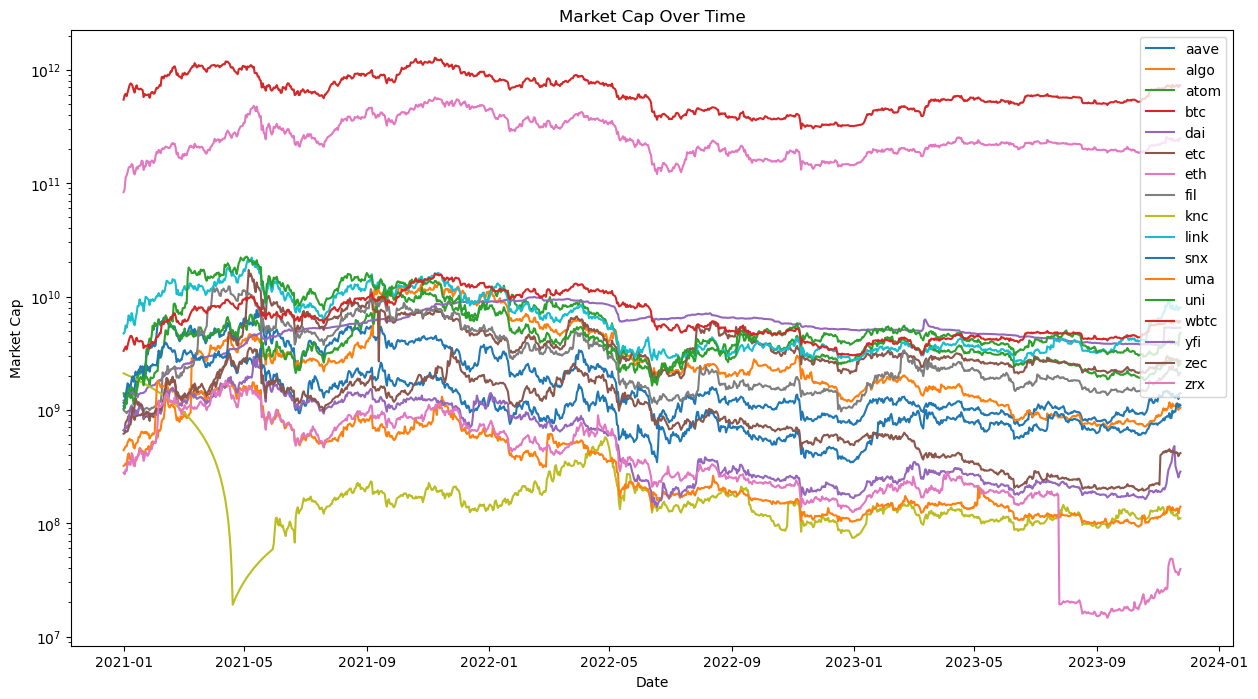

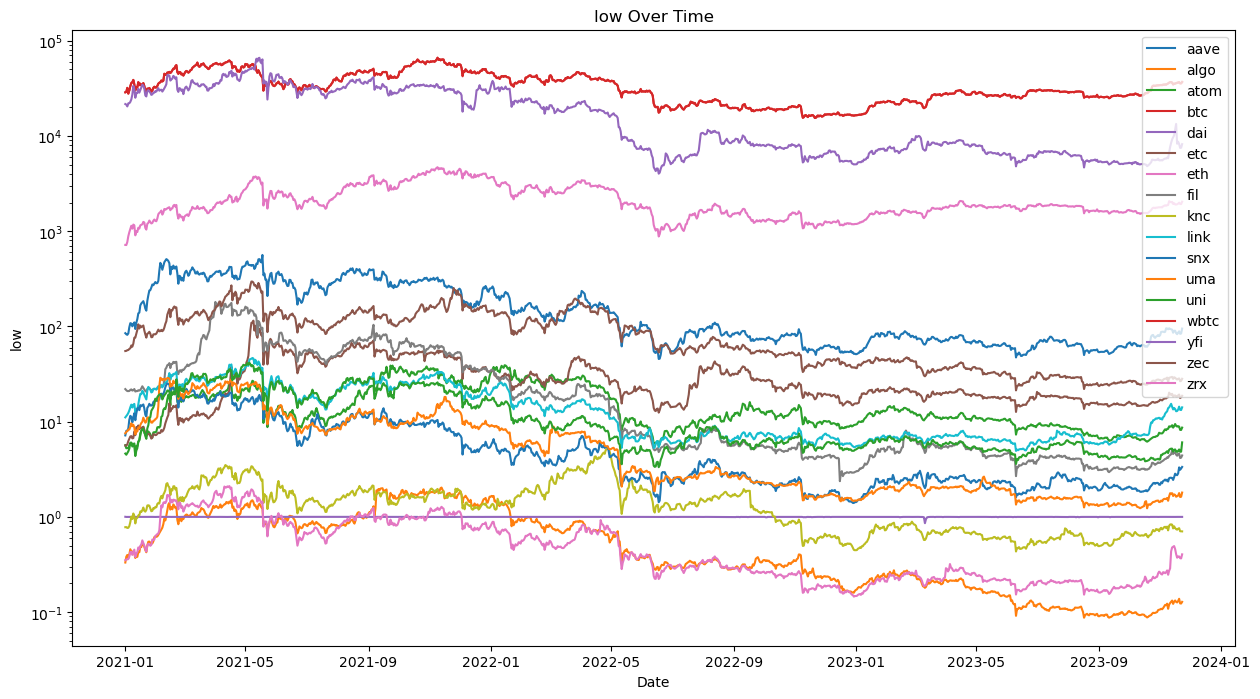

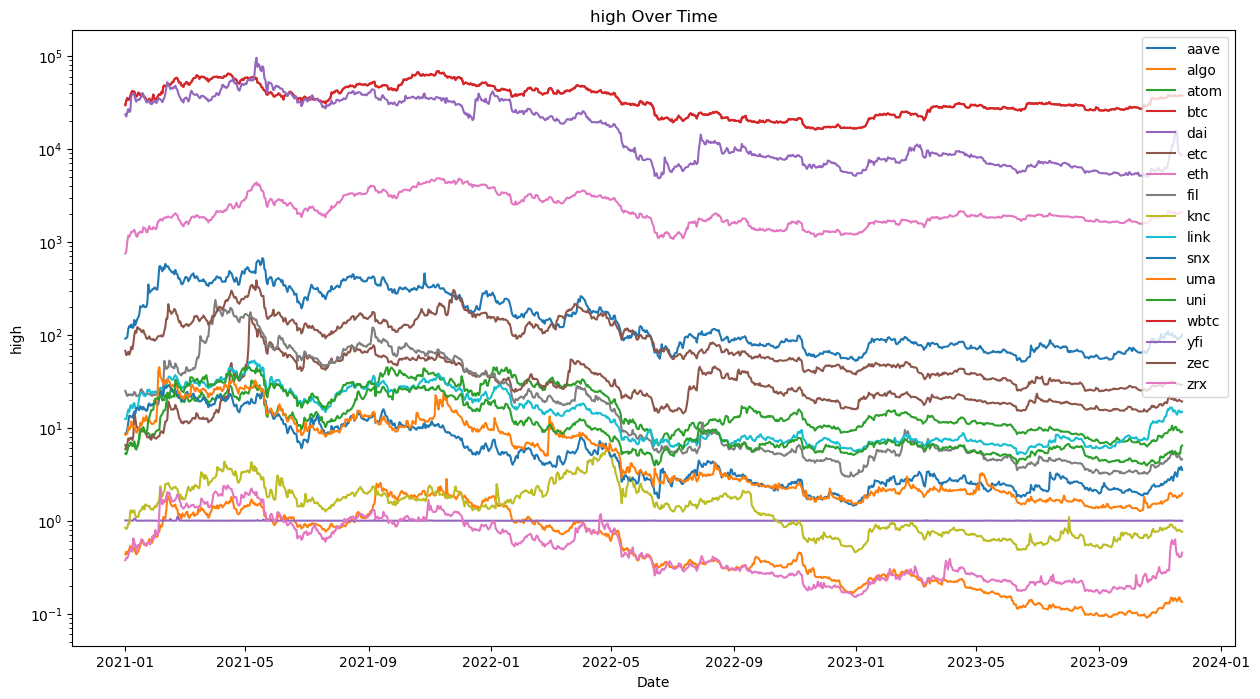

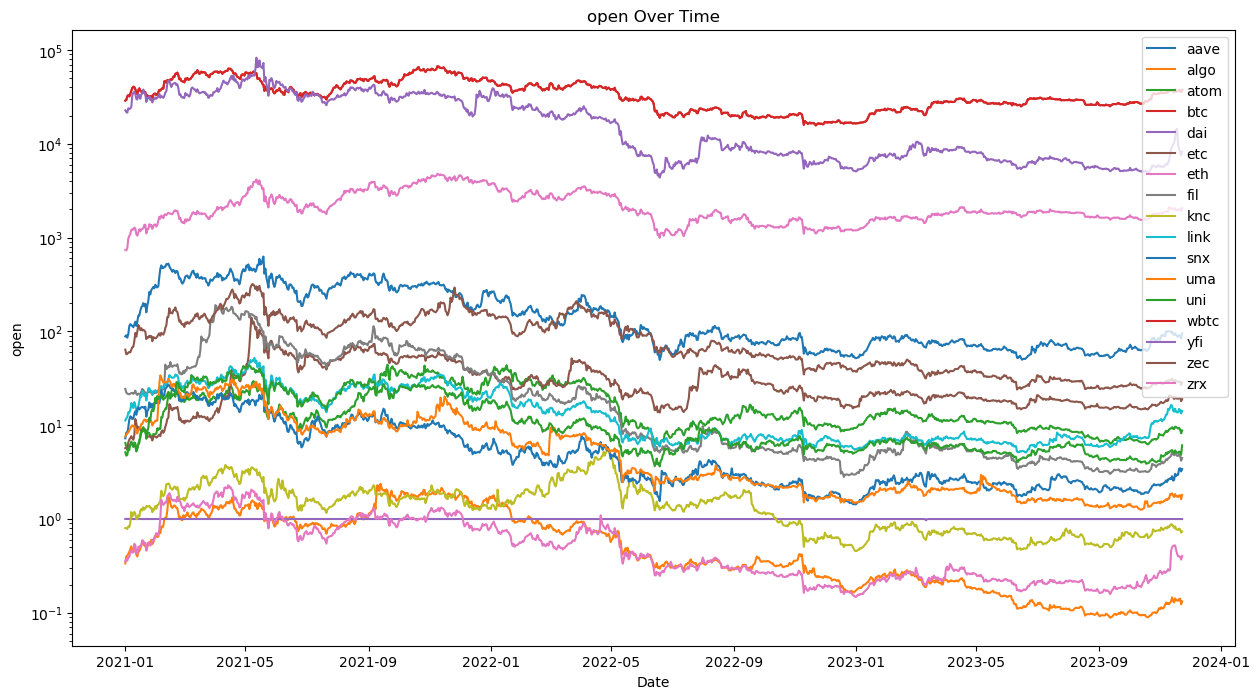

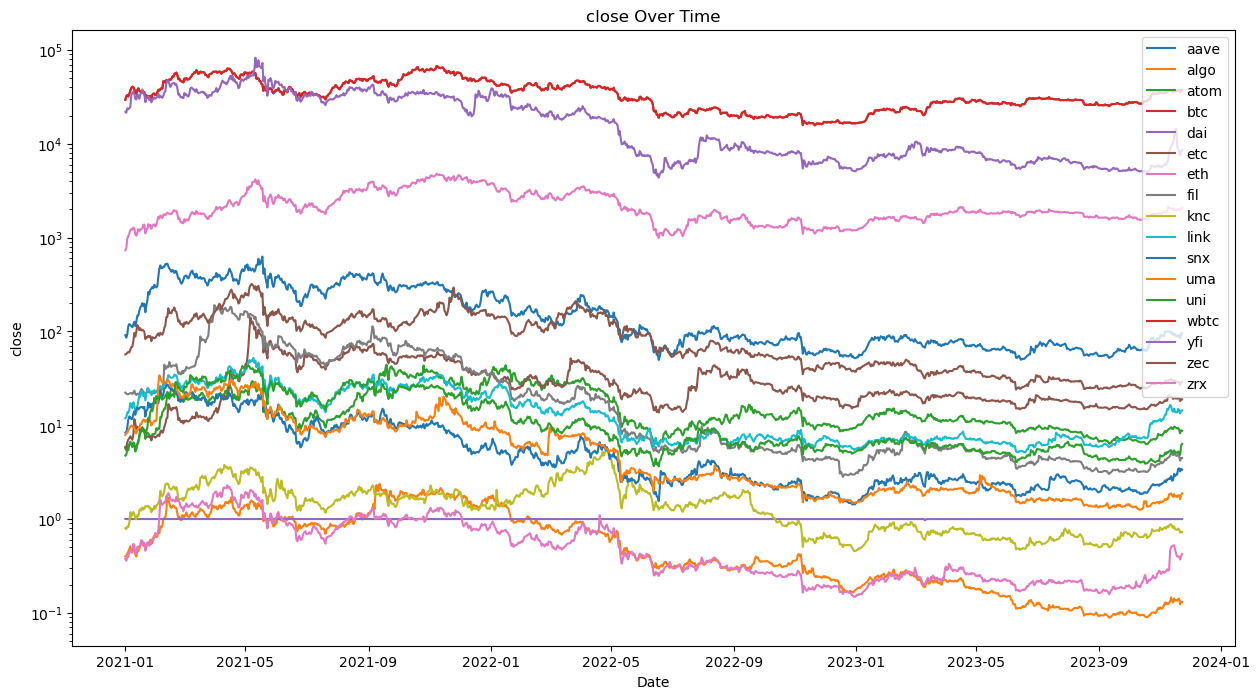

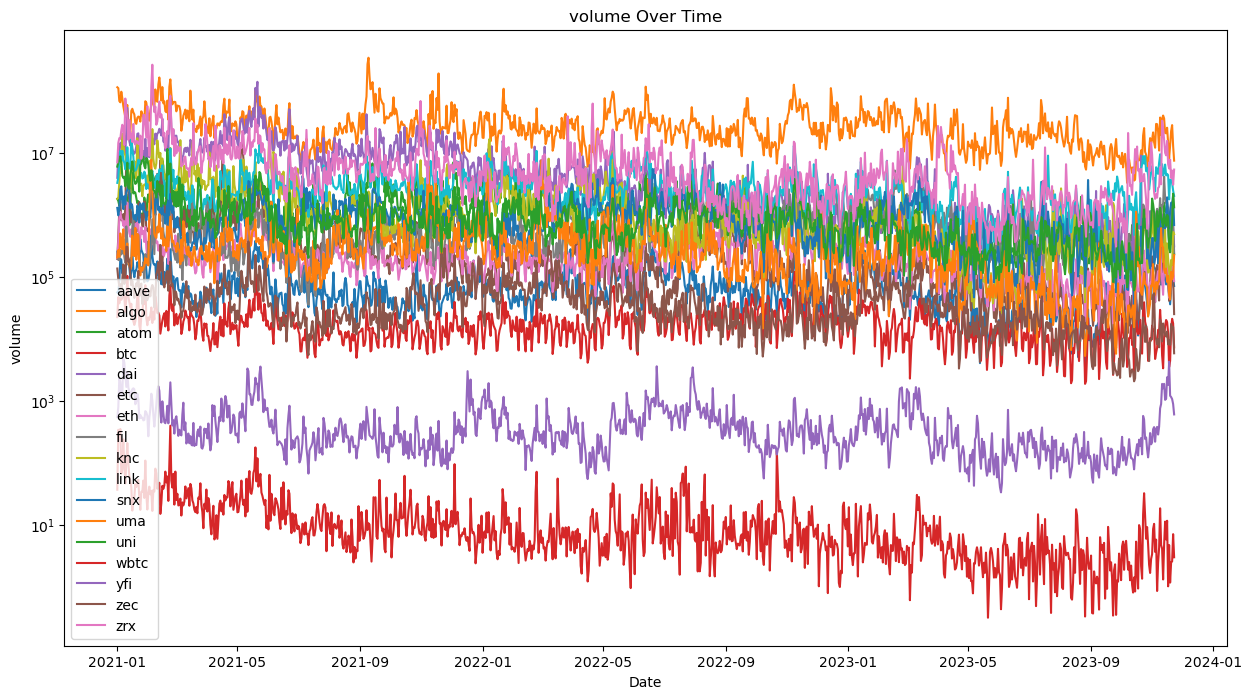

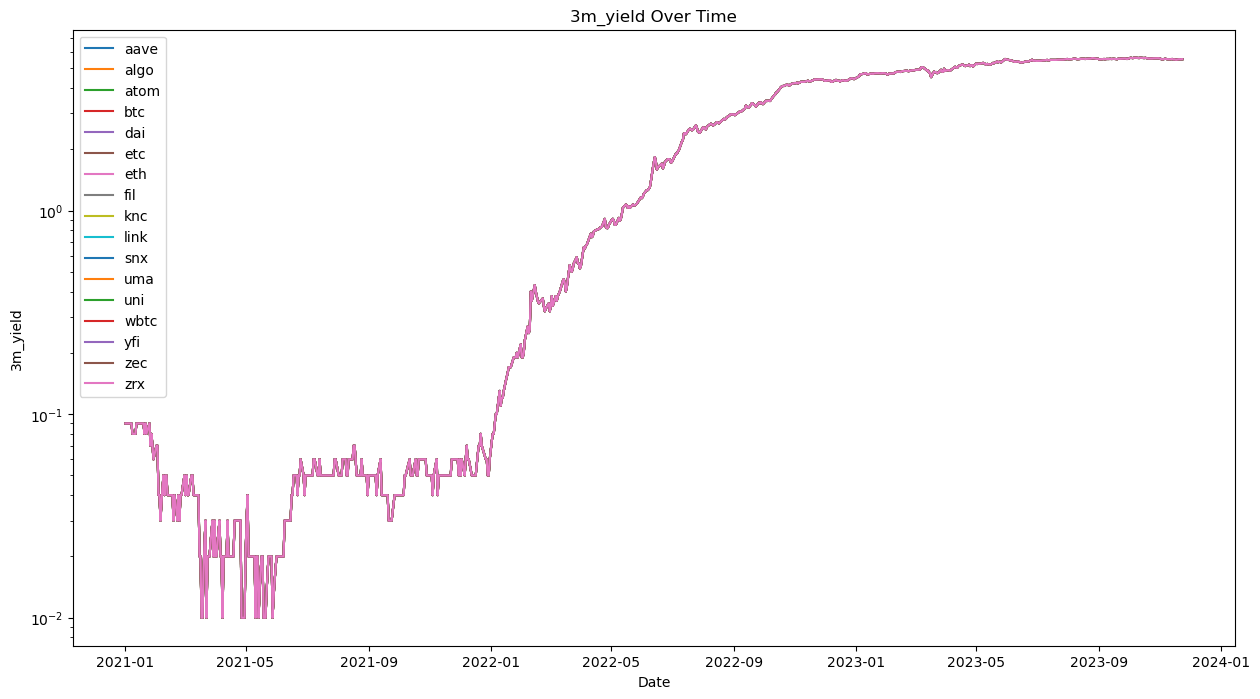

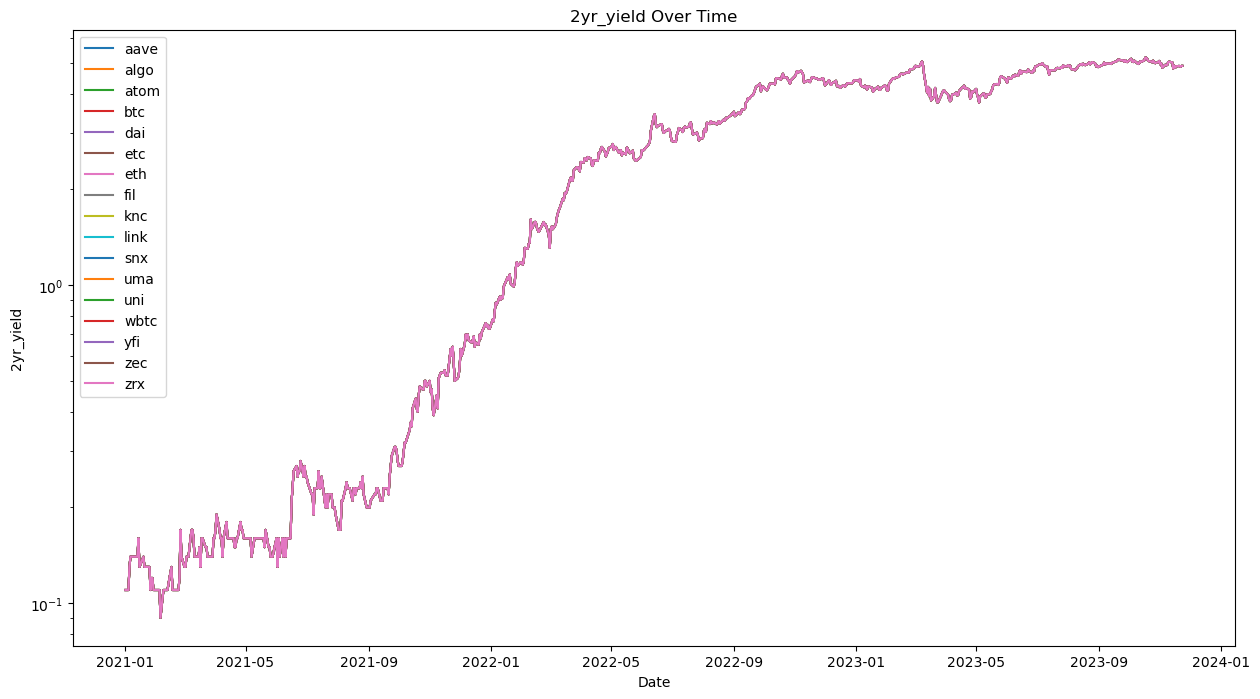

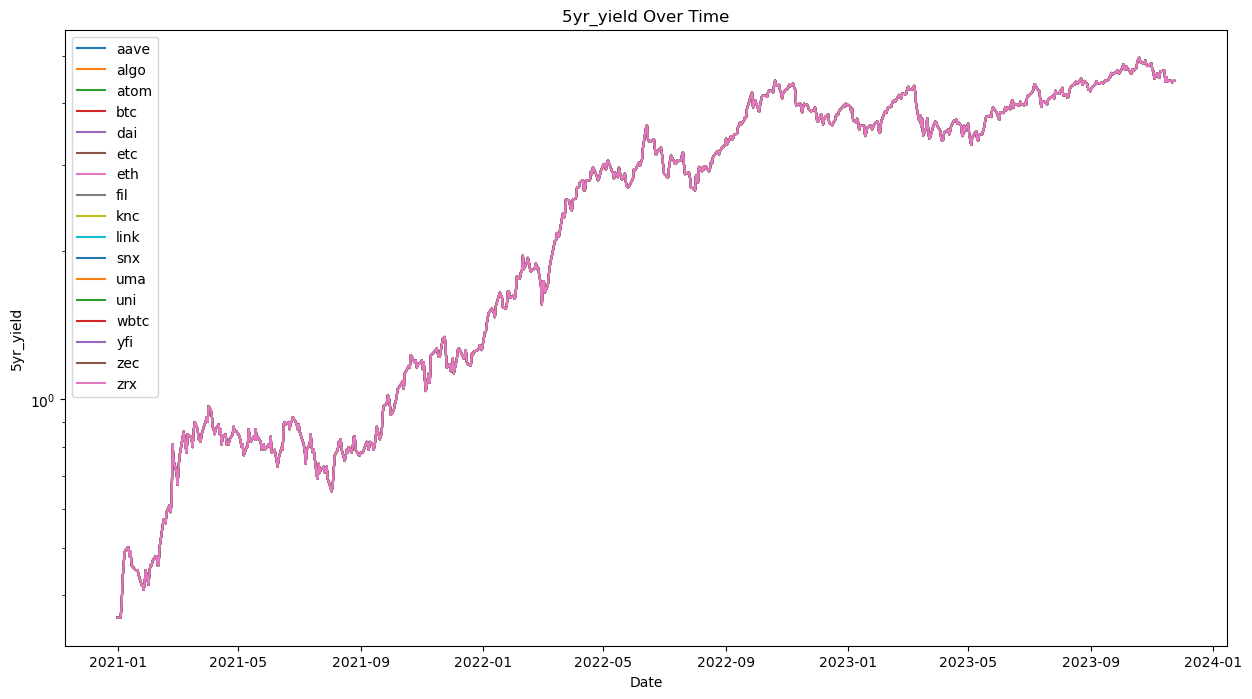

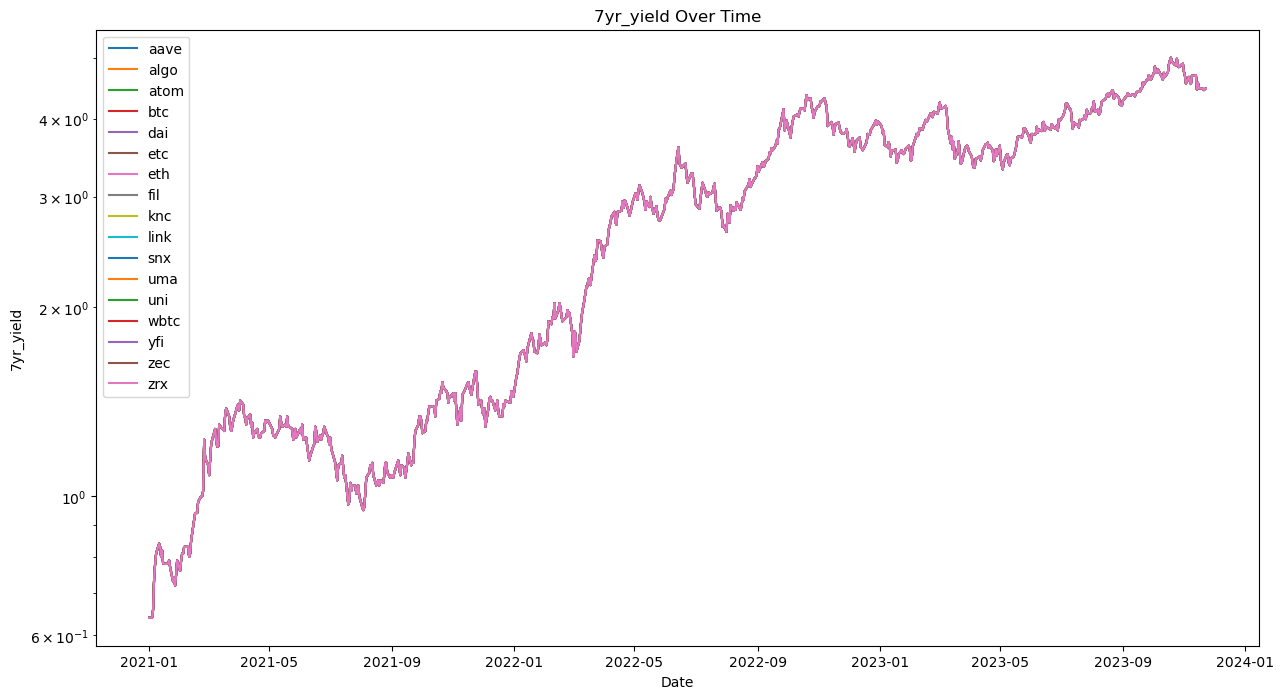

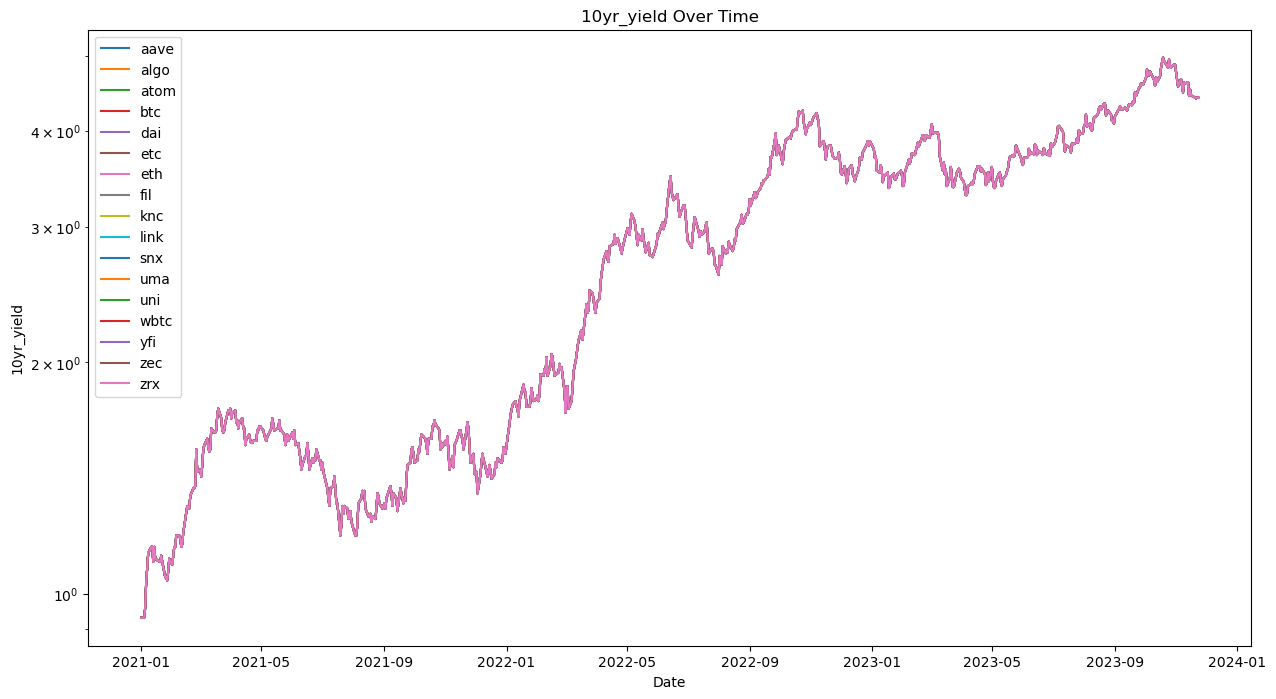

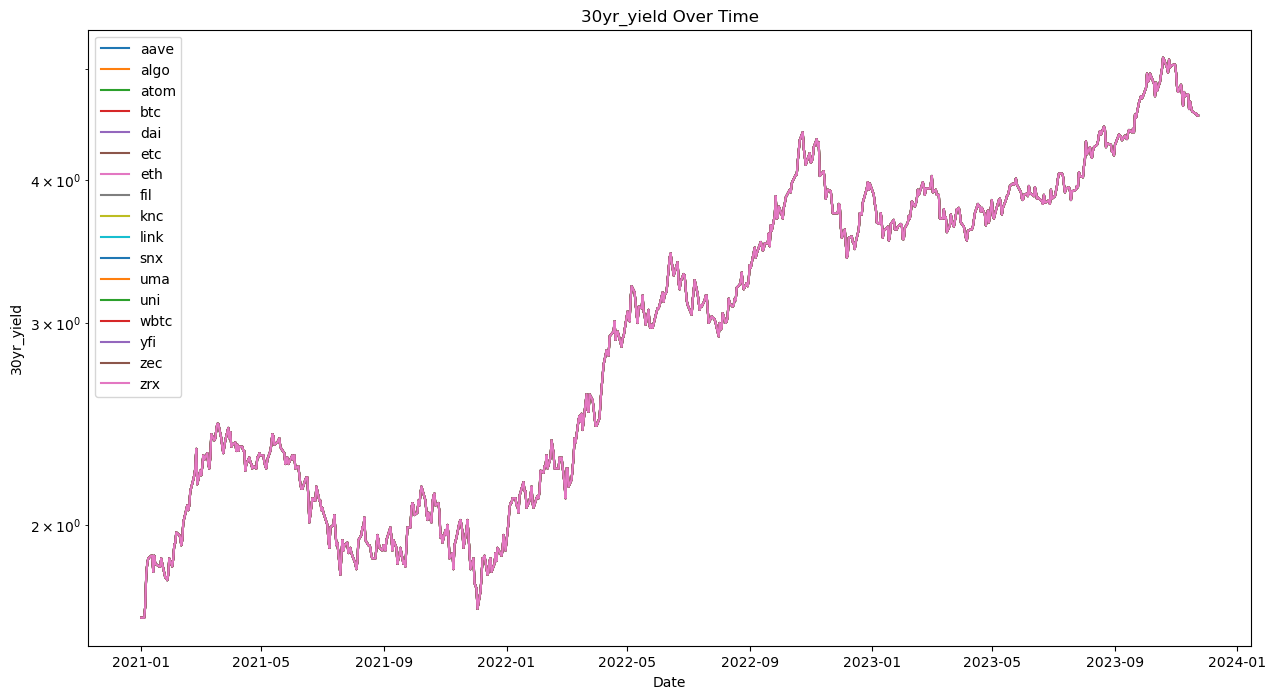

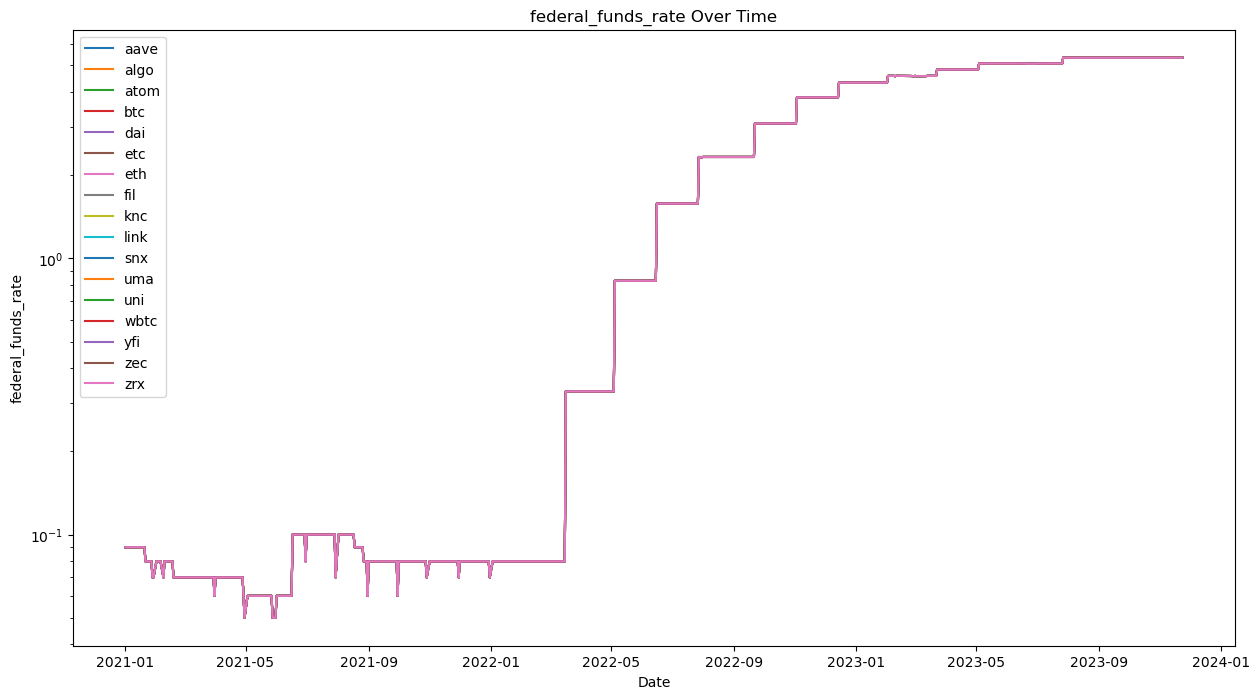

In [7]:
import matplotlib.pyplot as plt



# Convert timestamp to datetime and set it as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# List of unique cryptocurrencies
cryptocurrencies = df['coin_id'].unique()

# List of features to plot (excluding 'coin_id')
features = df.columns.drop('coin_id')

# Plot each feature for each cryptocurrency
for feature in features:
    plt.figure(figsize=(15, 8))

    for coin in cryptocurrencies:
        coin_data = df[df['coin_id'] == coin]
        plt.plot(coin_data[feature], label=coin)

    plt.title(f'{feature} Over Time')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.yscale('log')
    plt.legend()
    plt.show()

In [8]:
# Augmented Dickey Fuller Test for Stationarity 
from statsmodels.tsa.stattools import adfuller

# Dictionary to store the results for each cryptocurrency
adf_results = {}

cryptocurrencies = df['coin_id'].unique()

# Perform ADF test on the 'close' price of each cryptocurrency and store the results
for coin in cryptocurrencies:
    # Selecting the 'close' price for the specific coin
    coin_data = df[df['coin_id'] == coin]['close']
    # Dropping any NaNs in the series
    coin_data.dropna(inplace=True)
    # Performing the ADF test
    result = adfuller(coin_data)
    # Storing the results
    adf_results[coin] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Used Lag': result[2],
        'Number of Observations': result[3],
        'Critical Values': result[4],
    }

adf_results_df = pd.DataFrame(adf_results).T

adf_results_df


/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_74400/1142097247.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_74400/1142097247.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_74400/1142097247.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

ADF Statistic   p-value Used Lag Number of Observations  \
aave     -1.695906  0.433223       19                   1039   
algo     -0.982546  0.759577       16                   1042   
atom     -1.942144  0.312502       17                   1041   
btc      -1.624954  0.470133        1                   1057   
dai      -5.468462  0.000002       11                   1047   
etc       -2.90909  0.044301       20                   1038   
eth      -2.139332  0.228996        6                   1052   
fil       -1.87244  0.345135       20                   1038   
knc      -1.837906  0.361811       22                   1036   
link     -1.682771  0.440011       21                   1037   
snx      -1.569024  0.499132        8                   1050   
uma      -1.346204  0.607778       22                   1036   
uni      -1.605915  0.480622       14                   1044   
wbtc     -1.624761  0.470234        1                   1057   
yfi      -1.105683    0.7128       22                   1036   
zec      -1.610366  0.477783       20                   1038   
zrx      -1.963674  0.302724        6                   1052   

                                        Critical Values  
aave  {'1%': -3.436659460539809, '5%': -2.8643257672...  
algo  {'1%': -3.43664125006105, '5%': -2.86431773533...  
atom  {'1%': -3.436647308529461, '5%': -2.8643204074...  
btc   {'1%': -3.4365517520261637, '5%': -2.864278260...  
dai   {'1%': -3.4366111317433443, '5%': -2.864304451...  
etc   {'1%': -3.4366655541494944, '5%': -2.864328454...  
eth   {'1%': -3.436581300425998, '5%': -2.8642912936...  
fil   {'1%': -3.4366655541494944, '5%': -2.864328454...  
knc   {'1%': -3.436677776748241, '5%': -2.8643338457...  
link  {'1%': -3.436671659540904, '5%': -2.8643311477...  
snx   {'1%': -3.4365931987759417, '5%': -2.864296541...  
uma   {'1%': -3.436677776748241, '5%': -2.8643338457...  
uni   {'1%': -3.43662916802936, '5%': -2.86431240640...  
wbtc  {'1%': -3.4365517520261637, '5%': -2.864278260...  
yfi   {'1%': -3.436677776748241, '5%': -2.8643338457...  
zec   {'1%': -3.4366655541494944, '5%': -2.864328454...  
zrx   {'1%': -3.436581300425998, '5%': -2.8642912936...

## Augemented Dick Fuller Interpretation: 
The Augmented Dickey-Fuller (ADF) test is a common statistical test used to determine whether a given time series is stationary or not. When interpreting the results of the ADF test, focus on the following output:

ADF Statistic: For a time series to be considered stationary, this statistic should be a negative number and it should be less than the critical values.

p-value: The p-value tells us the probability that the time series is non-stationary. A common threshold for the p-value is 0.05. If the p-value is less than 0.05, you can reject the null hypothesis and conclude that the series is stationary.

Critical Values: The ADF test provides critical values for different confidence levels (1%, 5%, and 10%). If the ADF statistic is less than the critical value, the series is considered stationary at that confidence level. 

Number of Lags Used: The ADF test includes a parameter for the number of lags of the time series to include in the test. This value is automatically determined based on various criteria such as the Akaike Information Criterion (AIC).

Here's how to interpret the test:

If the ADF Statistic is lower than the critical value at 5% (more negative), and the p-value is below 0.05, you can reject the null hypothesis in favor of the alternative hypothesis, meaning the time series is stationary.

If the ADF Statistic is higher than the critical value at 5% (less negative), or the p-value is above 0.05, you fail to reject the null hypothesis, meaning the time series is non-stationary, and it will likely need differencing or some other form of transformation to make it stationary before using it in an ARIMA model.

Our ADF revealed that only two coins DAI and Ethereum classic (etc) displayed stationarity (relatively constant mean and variance). The remaining 16 cryptocurrencies will need to be differenced. This also means the order of differencing for dai and etc is 0 in model training. 

In [9]:
# Apply first differencing to all coins except 'dai' and 'etc'
df['close_diff'] = df.groupby('coin_id')['close'].apply(lambda x: x.diff() if x.name not in ['dai', 'etc'] else x)
# After differencing, drop the NaN values that result from the differencing operation
df = df.dropna(subset=['close_diff'])

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_74400/4037582896.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['close_diff'] = df.groupby('coin_id')['close'].apply(lambda x: x.diff() if x.name not in ['dai', 'etc'] else x)


In [10]:
# Augmented Dickey Fuller Test using 1st Differencing 
from statsmodels.tsa.stattools import adfuller

# Dictionary to store the results for each cryptocurrency
adf_results_2 = {}

cryptocurrencies = df['coin_id'].unique()

# Perform ADF test on the 'close_diff' of each cryptocurrency and store the results
for coin in cryptocurrencies:
    # Selecting the 'close_diff'  for the specific coin
    coin_data = df[df['coin_id'] == coin]['close_diff']
    # Dropping any NaNs in the series
    coin_data.dropna(inplace=True)
    # Performing the ADF test
    result = adfuller(coin_data)
    # Storing the results
    adf_results_2[coin] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Used Lag': result[2],
        'Number of Observations': result[3],
        'Critical Values': result[4],
    }

adf_results_df_2 = pd.DataFrame(adf_results_2).T

adf_results_df_2

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_74400/419247402.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_74400/419247402.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_74400/419247402.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

ADF Statistic   p-value Used Lag Number of Observations  \
aave      -7.82458       0.0       22                   1035   
algo     -10.26522       0.0       15                   1042   
atom     -8.154334       0.0       17                   1040   
btc     -33.949655       0.0        0                   1057   
dai      -5.468462  0.000002       11                   1047   
etc       -2.90909  0.044301       20                   1038   
eth     -12.401669       0.0        5                   1052   
fil       -7.01996       0.0       22                   1035   
knc      -8.316027       0.0       21                   1036   
link     -7.117648       0.0       20                   1037   
snx       -12.7616       0.0        7                   1050   
uma      -8.670115       0.0       21                   1036   
uni      -8.183631       0.0       13                   1044   
wbtc    -34.059415       0.0        0                   1057   
yfi      -8.924756       0.0       21                   1036   
zec      -8.048333       0.0       19                   1038   
zrx     -13.130211       0.0        5                   1052   

                                        Critical Values  
aave  {'1%': -3.4366839058058387, '5%': -2.864336548...  
algo  {'1%': -3.43664125006105, '5%': -2.86431773533...  
atom  {'1%': -3.4366533786777778, '5%': -2.864323084...  
btc   {'1%': -3.4365517520261637, '5%': -2.864278260...  
dai   {'1%': -3.4366111317433443, '5%': -2.864304451...  
etc   {'1%': -3.4366655541494944, '5%': -2.864328454...  
eth   {'1%': -3.436581300425998, '5%': -2.8642912936...  
fil   {'1%': -3.4366839058058387, '5%': -2.864336548...  
knc   {'1%': -3.436677776748241, '5%': -2.8643338457...  
link  {'1%': -3.436671659540904, '5%': -2.8643311477...  
snx   {'1%': -3.4365931987759417, '5%': -2.864296541...  
uma   {'1%': -3.436677776748241, '5%': -2.8643338457...  
uni   {'1%': -3.43662916802936, '5%': -2.86431240640...  
wbtc  {'1%': -3.4365517520261637, '5%': -2.864278260...  
yfi   {'1%': -3.436677776748241, '5%': -2.8643338457...  
zec   {'1%': -3.4366655541494944, '5%': -2.864328454...  
zrx   {'1%': -3.436581300425998, '5%': -2.8642912936...

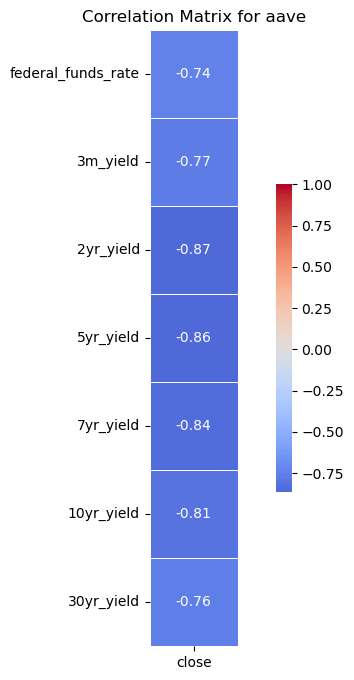

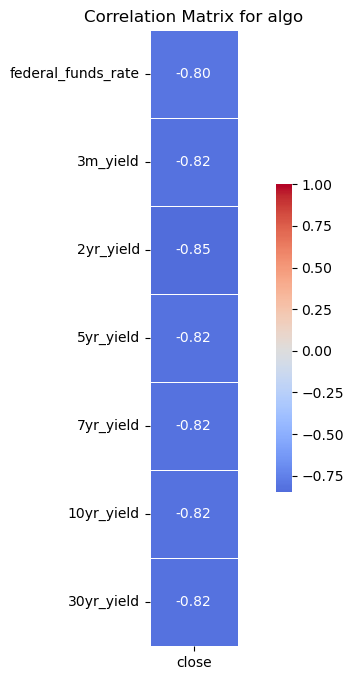

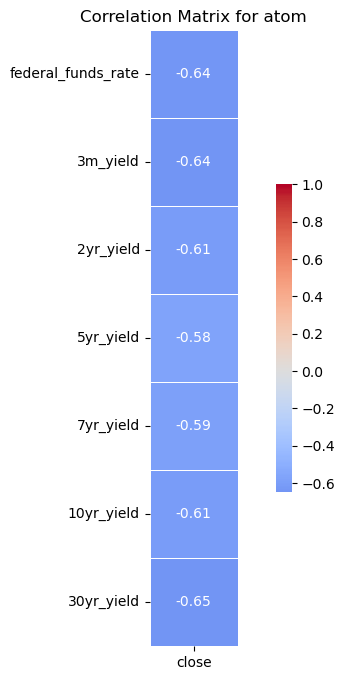

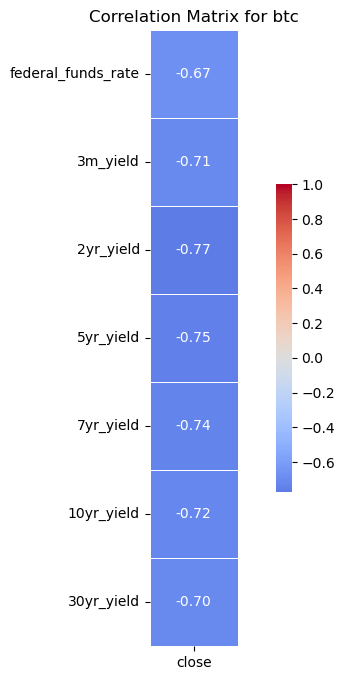

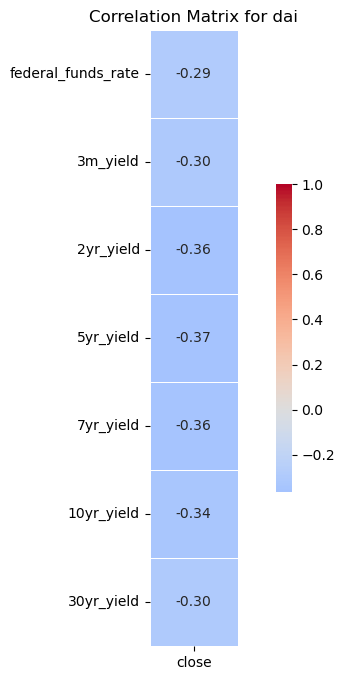

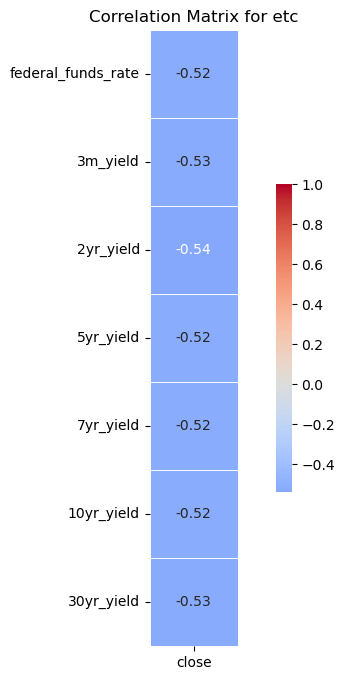

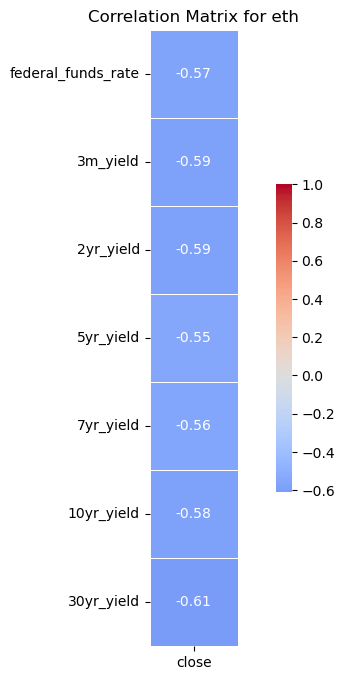

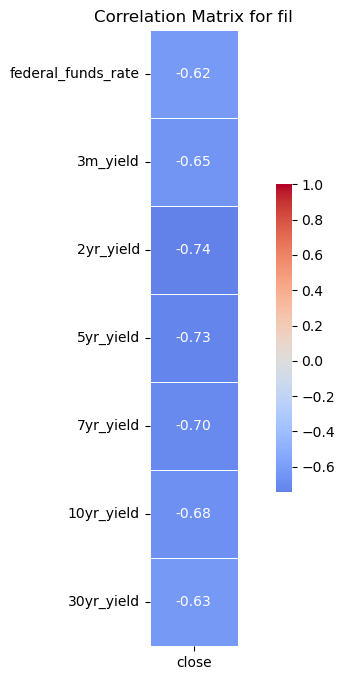

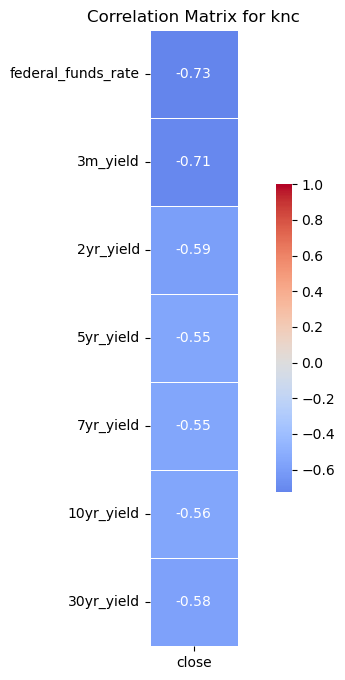

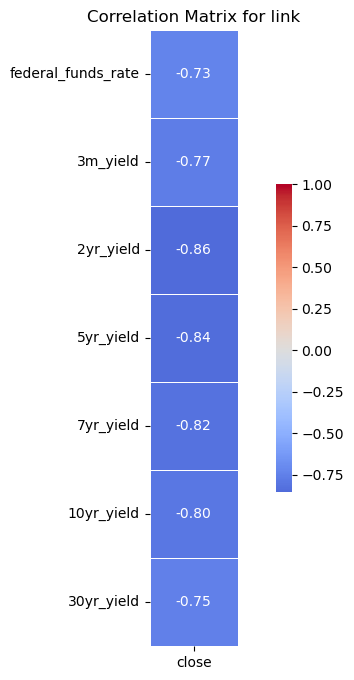

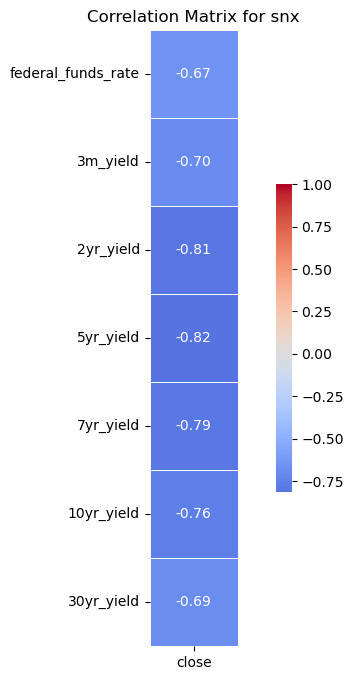

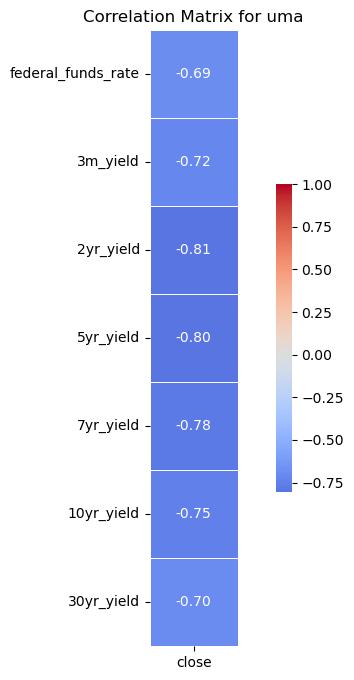

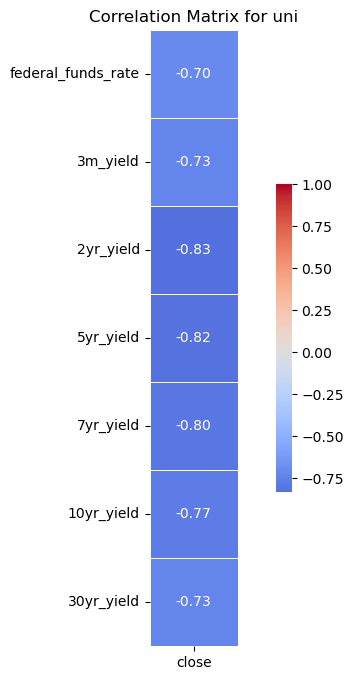

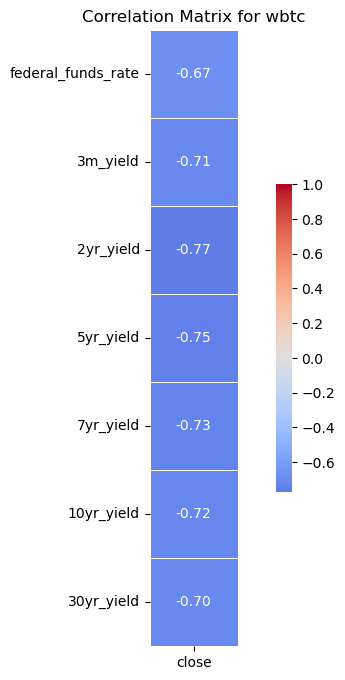

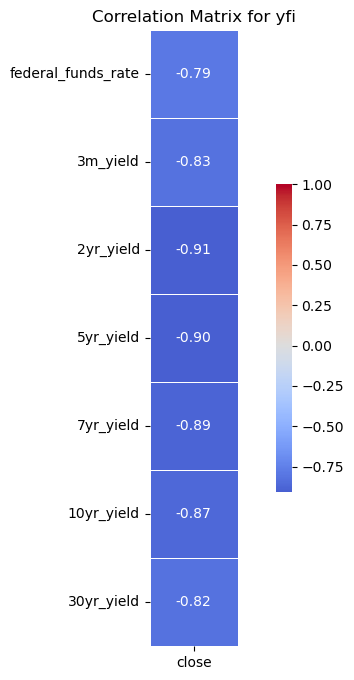

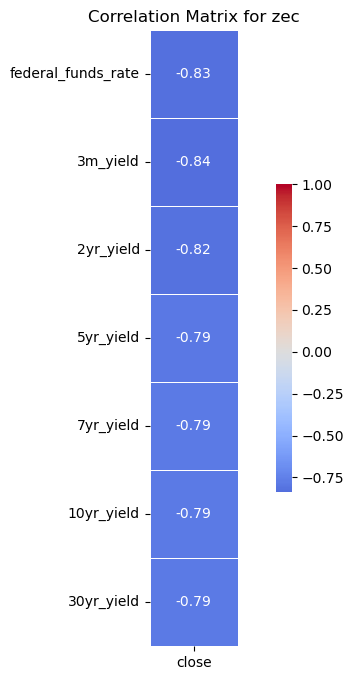

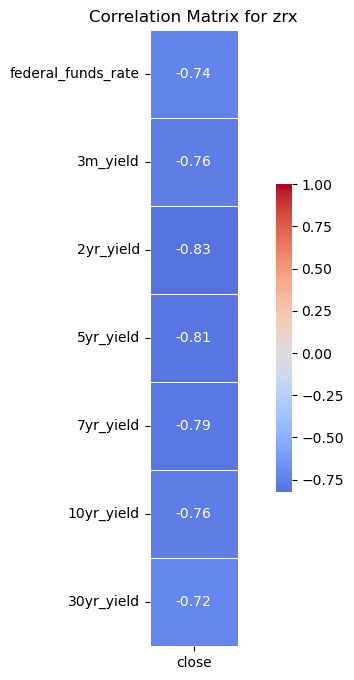

In [18]:
import seaborn as sns

# List of treasury yields and interest rate columns
fed_columns = ['federal_funds_rate', '3m_yield', '2yr_yield', '5yr_yield', '7yr_yield', '10yr_yield', '30yr_yield']


# Plotting correlation plots
for coin in cryptocurrencies:
    # Select data for the current coin
    coin_data = df[df['coin_id'] == coin]
    
    # Compute the correlation matrix for the close price and fed rates for this coin
    correlation_matrix = coin_data[['close'] + fed_columns].corr()
    
    # Extract the first row of the correlation matrix
    correlation_with_close = correlation_matrix.iloc[1:, 0:1]
    
    plt.figure(figsize=(10, 8))
    
    # Draw the heatmap with the correlation matrix
    sns.heatmap(correlation_with_close, annot=True, fmt=".2f", cmap='coolwarm',
                vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    plt.title(f'Correlation Matrix for {coin}')
    
    # Show plot
    plt.show()

In [68]:
# Dictionary to store the average correlation for each yield column
average_correlations = {}

# Calculate correlation for each coin and then take the average
for fed in fed_columns:
    correlations = []
    for coin in cryptocurrencies:
        coin_data = df[df['coin_id'] == coin]
        correlation = coin_data[['close', fed]].corr().iloc[0, 1]
        correlations.append(correlation)
    # Calculate the average correlation for this fed column
    average_correlations[fed] = sum(correlations) / len(correlations)
  
average_correlations

{'federal_funds_rate': -0.6701071603638565,
 '3m_yield': -0.692868686165413,
 '2yr_yield': -0.738362371736154,
 '5yr_yield': -0.721589152470047,
 '7yr_yield': -0.709011433425357,
 '10yr_yield': -0.6964811773584506,
 '30yr_yield': -0.6746372764864438}

# Fed Rates Correlation with crypto close prices

Daily close price of crypto currencies correlate strongly with 2 year, 5 year, and 7 year US treasury yields with average values of '2yr_yield': -0.738362371736154, '5yr_yield': -0.721589152470047,  '7yr_yield': -0.709011433425357. Treasury yields are often considered a reflection of risk appetite in the financial markets. Lower yields generally indicate a risk-off environment where investors are seeking safer assets, and higher yields suggest a risk-on environment. Cryptocurrencies are often considered high-risk assets. Strong negative correlation between yield and close price suggest that when yields are low, investors might be moving away from traditional safe-haven assets like US Treasuries and into riskier assets like cryptocurrencies, driving up their prices. Conversely, when yields are higher, the reverse might happen. Given these finding it is reasonable to include these treasury yields as features in our ARIMAX model. 

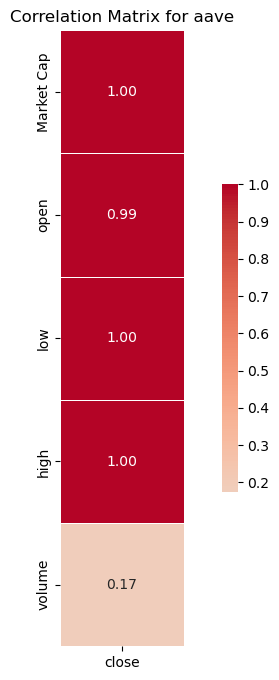

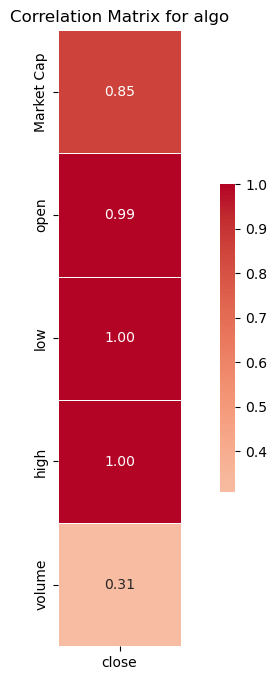

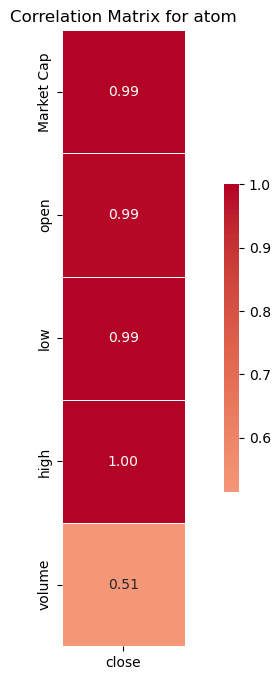

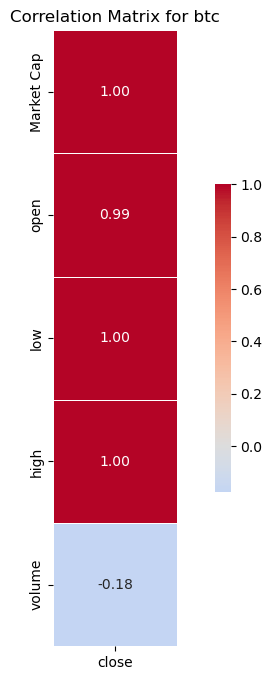

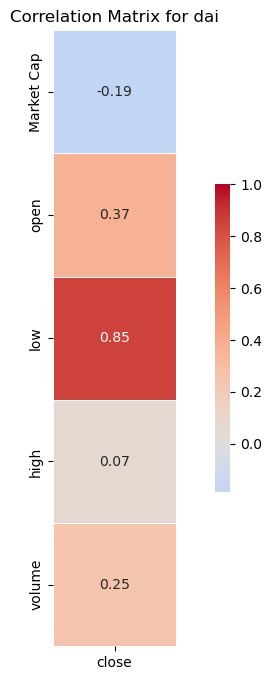

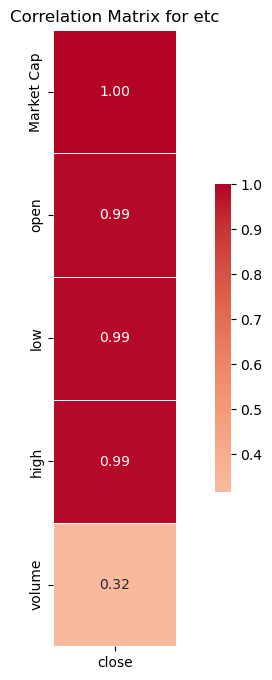

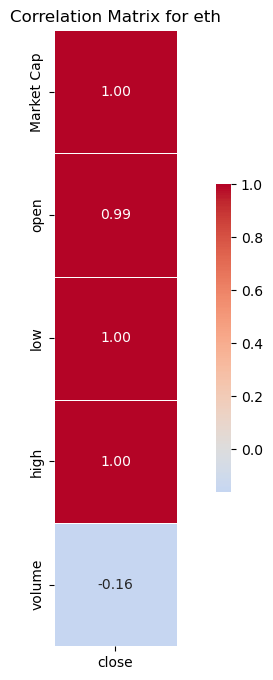

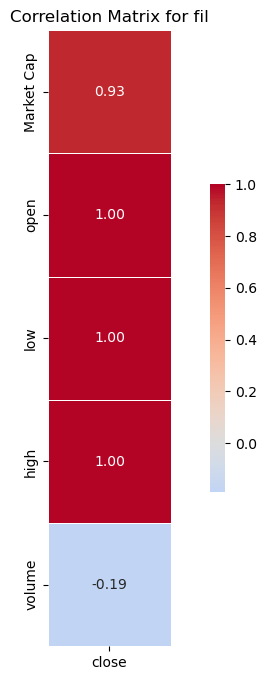

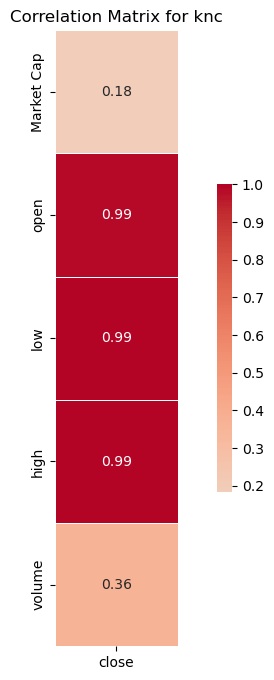

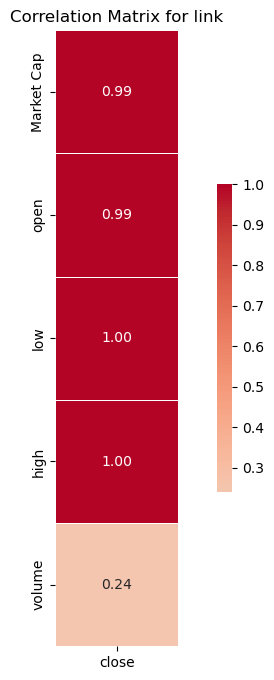

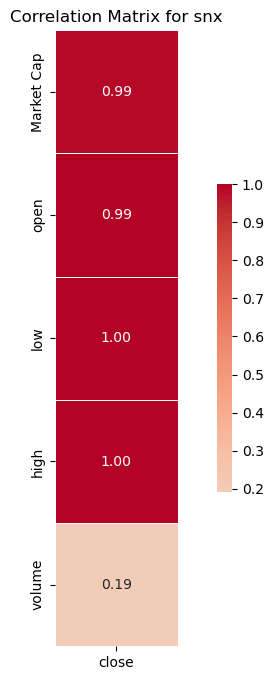

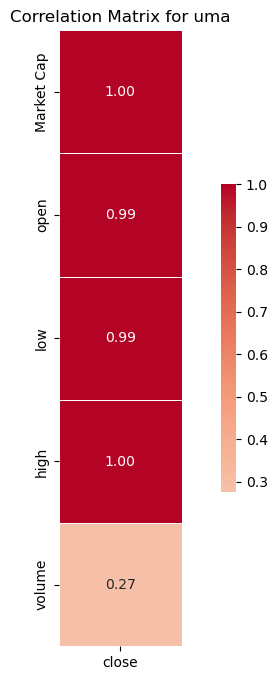

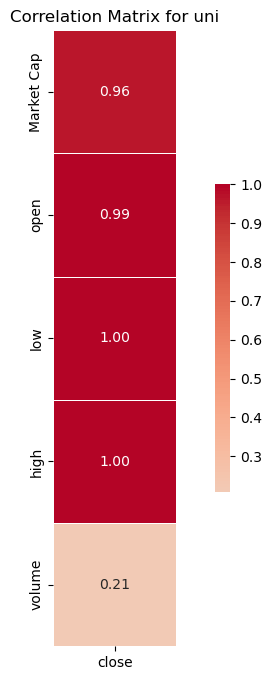

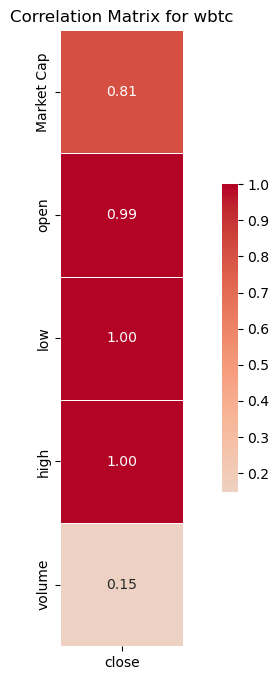

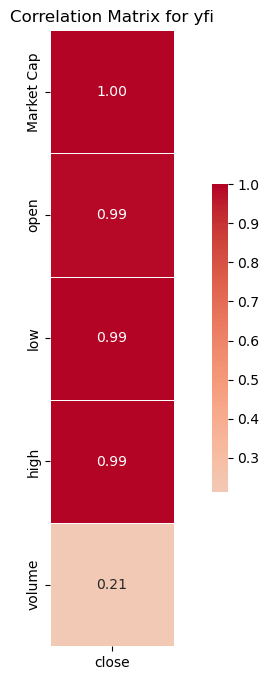

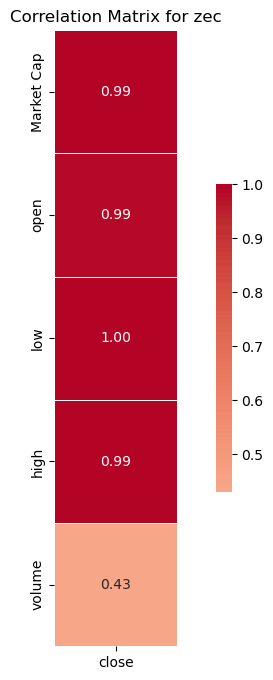

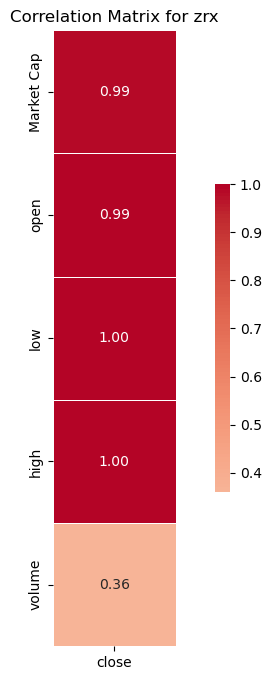

In [19]:
# Financial data columns to correlate with the close price
financial_columns = ['Market Cap', 'open', 'low', 'high', 'volume']


for coin in cryptocurrencies:
    coin_data = df[df['coin_id'] == coin]
    
    # Compute the correlation matrix for the close price and financial data for this coin
    correlation_matrix = coin_data[['close'] + financial_columns].corr()
    
    # Extract the first row of the correlation matrix
    correlation_with_close = correlation_matrix.iloc[1:, 0:1]
    
    plt.figure(figsize=(10, 8))
    
    # Draw the heatmap with the correlation matrix
    sns.heatmap(correlation_with_close, annot=True, fmt=".2f", cmap='coolwarm',
                vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    
    plt.title(f'Correlation Matrix for {coin}')
    
    plt.show()

In [70]:
# Dictionary to store the average correlation for each financial column
average_f_correlations = {}

# Calculate correlation for each coin and then take the average
for data in financial_columns:
    correlations = []
    for coin in cryptocurrencies:
        coin_data = df[df['coin_id'] == coin]
        correlation = coin_data[['close', data]].corr().iloc[0, 1]
        correlations.append(correlation)
    # Calculate the average correlation for this fed column
    average_f_correlations[data] = sum(correlations) / len(correlations)
  
average_f_correlations

{'Market Cap': 0.8523667513752243,
 'open': 0.9553454940133366,
 'low': 0.9870911007228285,
 'high': 0.9412074416379248,
 'volume': 0.20350852281120388}

# Market Data Correlation with crypto close prices
Close Price and Market Cap: The market cap of a cryptocurrency is a direct function of its price, hence high positive correlation

Close Price and Open/Low/High Prices: These correlations are typically strong in financial markets as they represent the price range within the same trading day or trading period. The open, low, and high prices provide context for the closing price.

Close Price and Volume: Trading volume represents the total amount of trading activity. Weak correlation with volume may indicate that price movements are not always accompanied by proportional changes in volume. High volume can occur due to speculative trading, large transactions by institutional investors, or other factors independent of price changes.

In [71]:
# Augmented Dickey Fuller Test on Fed Rates
yield_columns = ['2yr_yield', '5yr_yield', '7yr_yield']


adf_results_fed = []

# Perform ADF test on each yield column
for column in yield_columns:
    # Drop NaN values from the column
    series = df[column].dropna()
    
    # Perform the ADF test
    result = adfuller(series)
    
    # Append the results to the list
    adf_results_fed.append({
        'Column': column,
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Used Lag': result[2],
        'Number of Observations': result[3],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%']
    })

# Convert the list of results to a DataFrame
adf_results_fed_df = pd.DataFrame(adf_results_fed)
adf_results_fed_df

Column  ADF Statistic       p-value  Used Lag  Number of Observations  \
0  2yr_yield      -5.699267  7.743640e-07        23                   17964   
1  5yr_yield      -6.858771  1.622659e-09        38                   17949   
2  7yr_yield      -7.172583  2.779697e-10        44                   17943   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.430714            -2.861701             -2.566856  
1            -3.430714            -2.861701             -2.566856  
2            -3.430715            -2.861701             -2.566856

In [72]:
# Augmented Dickey Fuller Test on Market Data
financial_columns = ['Market Cap', 'open', 'low', 'high']

adf_results_market = []

# Perform ADF test on each financial column for each coin
for coin in cryptocurrencies:
    coin_data = df[df['coin_id'] == coin]
    
    for column in financial_columns:
        # Drop NaN values from the column
        series = coin_data[column].dropna()
        
        # Perform the ADF test
        result = adfuller(series)
        
        # Append the results to the list
        adf_results_market.append({
            'Coin': coin,
            'Column': column,
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Used Lag': result[2],
            'Number of Observations': result[3],
            'Critical Value (1%)': result[4]['1%'],
            'Critical Value (5%)': result[4]['5%'],
            'Critical Value (10%)': result[4]['10%']
        })

adf_results_market_df = pd.DataFrame(adf_results_market)
pd.set_option('display.max_rows', 85)

adf_results_market_df

Coin      Column  ADF Statistic       p-value  Used Lag  \
0   aave  Market Cap      -1.812829  3.741111e-01        18   
1   aave        open      -1.841531  3.600464e-01        17   
2   aave         low      -1.708266  4.268588e-01        16   
3   aave        high      -1.710698  4.256090e-01        22   
4   algo  Market Cap      -1.498717  5.341461e-01        12   
5   algo        open      -0.985038  7.586821e-01        16   
6   algo         low      -1.597394  4.849022e-01         0   
7   algo        high      -1.143413  6.974526e-01        19   
8   atom  Market Cap      -1.913856  3.255709e-01        18   
9   atom        open      -1.946301  3.106029e-01        17   
10  atom         low      -1.956252  3.060783e-01         3   
11  atom        high      -1.939889  3.135349e-01        19   
12   btc  Market Cap      -1.700814  4.306932e-01         0   
13   btc        open      -1.624709  4.702614e-01         1   
14   btc         low      -1.688411  4.370929e-01        18   
15   btc        high      -1.577776  4.947470e-01         1   
16   dai  Market Cap      -2.230376  1.954060e-01         2   
17   dai        open      -4.781496  5.899647e-05        13   
18   dai         low     -18.477595  2.135495e-30         1   
19   dai        high      -7.895853  4.313069e-12         9   
20   etc  Market Cap      -2.908017  4.442365e-02        22   
21   etc        open      -2.898896  4.547653e-02        20   
22   etc         low      -2.683156  7.699871e-02        20   
23   etc        high      -2.839085  5.290402e-02        19   
24   eth  Market Cap      -2.163835  2.196320e-01         6   
25   eth        open      -2.136719  2.300082e-01         6   
26   eth         low      -2.428026  1.339820e-01         0   
27   eth        high      -2.023395  2.764104e-01         8   
28   fil  Market Cap      -2.305750  1.701202e-01        19   
29   fil        open      -1.870315  3.461522e-01        20   
30   fil         low      -1.835182  3.631398e-01        22   
31   fil        high      -1.937273  3.147348e-01        21   
32   knc  Market Cap      -5.478050  2.317667e-06        21   
33   knc        open      -1.837826  3.618504e-01        22   
34   knc         low      -2.819442  5.554984e-02         7   
35   knc        high      -2.003229  2.851590e-01        16   
36  link  Market Cap      -1.739424  4.109228e-01        21   
37  link        open      -1.679783  4.415578e-01        21   
38  link         low      -1.757645  4.016833e-01         8   
39  link        high      -1.687575  4.375254e-01        20   
40   snx  Market Cap      -1.812851  3.741005e-01        10   
41   snx        open      -1.570600  4.983430e-01         8   
42   snx         low      -1.641462  4.614971e-01         6   
43   snx        high      -1.681288  4.407784e-01        22   
44   uma  Market Cap      -1.372023  5.956129e-01        22   
45   uma        open      -1.339831  6.107582e-01        22   
46   uma         low      -1.848528  3.566487e-01         1   
47   uma        high      -1.895319  3.342662e-01         5   
48   uni  Market Cap      -2.145266  2.267066e-01        14   
49   uni        open      -1.600867  4.831579e-01        14   
50   uni         low      -1.641776  4.613328e-01         9   
51   uni        high      -1.513553  5.267967e-01        22   
52  wbtc  Market Cap      -1.620672  4.723769e-01         9   
53  wbtc        open      -1.627427  4.688378e-01         1   
54  wbtc         low      -1.670835  4.461981e-01         8   
55  wbtc        high      -1.579904  4.936799e-01         1   
56   yfi  Market Cap      -1.043544  7.370534e-01        22   
57   yfi        open      -1.112034  7.102491e-01        22   
58   yfi         low      -1.436028  5.648874e-01         8   
59   yfi        high      -1.466534  5.499970e-01        11   
60   zec  Market Cap      -1.634532  4.651194e-01        20   
61   zec        open      -1.608087  4.795301e-01        20   
62   zec         low      -1.451015

In [73]:
# Apply first differencing to all coins except 'dai' for price high
df['high_diff'] = df.groupby('coin_id')['high'].apply(lambda x: x.diff() if x.name not in ['dai'] else x)
# After differencing, drop the NaN values that result from the differencing operation
df = df.dropna(subset=['high_diff'])

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/2688932620.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['high_diff'] = df.groupby('coin_id')['high'].apply(lambda x: x.diff() if x.name not in ['dai'] else x)


In [74]:
# Augmented Dickey Fuller Test for Market High
from statsmodels.tsa.stattools import adfuller

# Dictionary to store the results for each cryptocurrency
adf_results_high = {}

# Perform ADF test on the 'high' price of each cryptocurrency and store the results
for coin in cryptocurrencies:
    # Selecting the 'close' price for the specific coin
    coin_data = df[df['coin_id'] == coin]['high_diff']
    # Dropping any NaNs in the series
    coin_data.dropna(inplace=True)
    # Performing the ADF test
    result = adfuller(coin_data)
    # Storing the results
    adf_results_high[coin] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Used Lag': result[2],
        'Number of Observations': result[3],
        'Critical Values': result[4],
    }

adf_high_df = pd.DataFrame(adf_results_high).T

adf_high_df

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/593120727.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/593120727.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/593120727.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

ADF Statistic p-value Used Lag Number of Observations  \
aave     -7.621457     0.0       22                   1034   
algo     -8.465642     0.0       18                   1038   
atom     -7.664695     0.0       18                   1038   
btc     -29.539718     0.0        0                   1056   
dai      -7.895853     0.0        9                   1049   
etc      -7.817719     0.0       18                   1039   
eth      -11.00841     0.0        7                   1049   
fil      -6.918961     0.0       20                   1036   
knc      -9.348404     0.0       15                   1041   
link     -7.229965     0.0       19                   1037   
snx      -8.584794     0.0       21                   1035   
uma     -17.282375     0.0        4                   1052   
uni      -6.563006     0.0       21                   1035   
wbtc    -29.845019     0.0        0                   1056   
yfi     -12.181031     0.0       10                   1046   
zec     -11.029024     0.0        8                   1048   
zrx      -8.274057     0.0       18                   1038   

                                        Critical Values  
aave  {'1%': -3.4366900467481667, '5%': -2.864339257...  
algo  {'1%': -3.4366655541494944, '5%': -2.864328454...  
atom  {'1%': -3.4366655541494944, '5%': -2.864328454...  
btc   {'1%': -3.436557639266102, '5%': -2.8642808573...  
dai   {'1%': -3.4365991650067502, '5%': -2.864299173...  
etc   {'1%': -3.436659460539809, '5%': -2.8643257672...  
eth   {'1%': -3.4365991650067502, '5%': -2.864299173...  
fil   {'1%': -3.436677776748241, '5%': -2.8643338457...  
knc   {'1%': -3.436647308529461, '5%': -2.8643204074...  
link  {'1%': -3.436671659540904, '5%': -2.8643311477...  
snx   {'1%': -3.4366839058058387, '5%': -2.864336548...  
uma   {'1%': -3.436581300425998, '5%': -2.8642912936...  
uni   {'1%': -3.4366839058058387, '5%': -2.864336548...  
wbtc  {'1%': -3.436557639266102, '5%': -2.8642808573...  
yfi   {'1%': -3.436617132314828, '5%': -2.8643070978...  
zec   {'1%': -3.436605142651622, '5%': -2.8643018096...  
zrx   {'1%': -3.4366655541494944, '5%': -2.864328454...

In [75]:
# Apply first differencing to all coins except 'dai' for price low
df['low_diff'] = df.groupby('coin_id')['low'].apply(lambda x: x.diff() if x.name not in ['dai'] else x)
# After differencing, drop the NaN values that result from the differencing operation
df = df.dropna(subset=['low_diff'])

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/3128289561.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['low_diff'] = df.groupby('coin_id')['low'].apply(lambda x: x.diff() if x.name not in ['dai'] else x)


In [76]:
# Augmented Dickey Fuller Test for Market Low
from statsmodels.tsa.stattools import adfuller

# Dictionary to store the results for each cryptocurrency
adf_low = {}

# Perform ADF test on the 'low' price of each cryptocurrency and store the results
for coin in cryptocurrencies:
    # Selecting the 'close' price for the specific coin
    coin_data = df[df['coin_id'] == coin]['low_diff']
    # Dropping any NaNs in the series
    coin_data.dropna(inplace=True)
    # Performing the ADF test
    result = adfuller(coin_data)
    # Storing the results
    adf_low[coin] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Used Lag': result[2],
        'Number of Observations': result[3],
        'Critical Values': result[4],
    }

adf_low_df = pd.DataFrame(adf_low).T

adf_low_df

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/1323110400.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/1323110400.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/1323110400.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

ADF Statistic p-value Used Lag Number of Observations  \
aave     -8.447166     0.0       15                   1040   
algo    -20.429438     0.0        2                   1053   
atom    -21.959938     0.0        2                   1053   
btc      -7.726685     0.0       17                   1038   
dai     -18.477595     0.0        1                   1057   
etc      -7.144013     0.0       19                   1037   
eth     -33.757495     0.0        0                   1055   
fil      -7.075784     0.0       21                   1034   
knc     -10.599042     0.0        9                   1046   
link     -7.925191     0.0       22                   1033   
snx     -12.070236     0.0        9                   1046   
uma      -8.698013     0.0       22                   1033   
uni     -13.376297     0.0        7                   1048   
wbtc     -7.781818     0.0       17                   1038   
yfi      -9.084939     0.0       22                   1033   
zec      -8.290102     0.0       21                   1034   
zrx     -11.637188     0.0        7                   1048   

                                        Critical Values  
aave  {'1%': -3.4366533786777778, '5%': -2.864323084...  
algo  {'1%': -3.4365753682419133, '5%': -2.864288677...  
atom  {'1%': -3.4365753682419133, '5%': -2.864288677...  
btc   {'1%': -3.4366655541494944, '5%': -2.864328454...  
dai   {'1%': -3.4365517520261637, '5%': -2.864278260...  
etc   {'1%': -3.436671659540904, '5%': -2.8643311477...  
eth   {'1%': -3.4365635376940706, '5%': -2.864283458...  
fil   {'1%': -3.4366900467481667, '5%': -2.864339257...  
knc   {'1%': -3.436617132314828, '5%': -2.8643070978...  
link  {'1%': -3.4366961996098264, '5%': -2.864341971...  
snx   {'1%': -3.436617132314828, '5%': -2.8643070978...  
uma   {'1%': -3.4366961996098264, '5%': -2.864341971...  
uni   {'1%': -3.436605142651622, '5%': -2.8643018096...  
wbtc  {'1%': -3.4366655541494944, '5%': -2.864328454...  
yfi   {'1%': -3.4366961996098264, '5%': -2.864341971...  
zec   {'1%': -3.4366900467481667, '5%': -2.864339257...  
zrx   {'1%': -3.436605142651622, '5%': -2.8643018096...

In [77]:
# Apply first differencing to all coins except 'dai' for price low
df['open_diff'] = df.groupby('coin_id')['open'].apply(lambda x: x.diff() if x.name not in ['dai', 'etc'] else x)
# After differencing, drop the NaN values that result from the differencing operation
df = df.dropna(subset=['open_diff'])

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/3185568714.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['open_diff'] = df.groupby('coin_id')['open'].apply(lambda x: x.diff() if x.name not in ['dai', 'etc'] else x)


In [78]:
# Augmented Dickey Fuller Test for Market open
from statsmodels.tsa.stattools import adfuller

# Dictionary to store the results for each cryptocurrency
adf_open = {}

# Perform ADF test on the 'open' price of each cryptocurrency and store the results
for coin in cryptocurrencies:
    # Selecting the 'close' price for the specific coin
    coin_data = df[df['coin_id'] == coin]['open_diff']
    # Dropping any NaNs in the series
    coin_data.dropna(inplace=True)
    # Performing the ADF test
    result = adfuller(coin_data)
    # Storing the results
    adf_open[coin] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Used Lag': result[2],
        'Number of Observations': result[3],
        'Critical Values': result[4],
    }

adf_open_df = pd.DataFrame(adf_open).T

adf_open_df

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/1455197933.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/1455197933.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/1455197933.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

ADF Statistic   p-value Used Lag Number of Observations  \
aave     -7.834673       0.0       22                   1032   
algo    -10.228864       0.0       15                   1039   
atom     -8.122109       0.0       17                   1037   
btc     -33.832683       0.0        0                   1054   
dai      -4.781496  0.000059       13                   1045   
etc      -2.912297  0.043937       20                   1036   
eth     -12.366069       0.0        5                   1049   
fil      -7.001887       0.0       22                   1032   
knc      -8.299982       0.0       21                   1033   
link     -7.286943       0.0       20                   1034   
snx     -12.661935       0.0        7                   1047   
uma      -8.678691       0.0       21                   1033   
uni      -8.184989       0.0       13                   1041   
wbtc    -33.830202       0.0        0                   1054   
yfi      -8.927819       0.0       21                   1033   
zec      -8.042221       0.0       19                   1035   
zrx      -13.15162       0.0        5                   1049   

                                        Critical Values  
aave  {'1%': -3.4367023644255537, '5%': -2.864344690...  
algo  {'1%': -3.436659460539809, '5%': -2.8643257672...  
atom  {'1%': -3.436671659540904, '5%': -2.8643311477...  
btc   {'1%': -3.4365694473419928, '5%': -2.864286065...  
dai   {'1%': -3.4366231443991118, '5%': -2.864309749...  
etc   {'1%': -3.436677776748241, '5%': -2.8643338457...  
eth   {'1%': -3.4365991650067502, '5%': -2.864299173...  
fil   {'1%': -3.4367023644255537, '5%': -2.864344690...  
knc   {'1%': -3.4366961996098264, '5%': -2.864341971...  
link  {'1%': -3.4366900467481667, '5%': -2.864339257...  
snx   {'1%': -3.4366111317433443, '5%': -2.864304451...  
uma   {'1%': -3.4366961996098264, '5%': -2.864341971...  
uni   {'1%': -3.436647308529461, '5%': -2.8643204074...  
wbtc  {'1%': -3.4365694473419928, '5%': -2.864286065...  
yfi   {'1%': -3.4366961996098264, '5%': -2.864341971...  
zec   {'1%': -3.4366839058058387, '5%': -2.864336548...  
zrx   {'1%': -3.4365991650067502, '5%': -2.864299173...

In [79]:
# Apply first differencing to all coins except 'dai' for price low
df['Market_Cap_diff'] = df.groupby('coin_id')['Market Cap'].apply(lambda x: x.diff() if x.name not in ['knc', 'etc'] else x)
# After differencing, drop the NaN values that result from the differencing operation
df = df.dropna(subset=['Market_Cap_diff'])

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/1995515522.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Market_Cap_diff'] = df.groupby('coin_id')['Market Cap'].apply(lambda x: x.diff() if x.name not in ['knc', 'etc'] else x)


In [80]:
# Augmented Dickey Fuller Test for Market Cap
from statsmodels.tsa.stattools import adfuller

# Dictionary to store the results for each cryptocurrency
adf_market_cap = {}

# Perform ADF test on the 'open' price of each cryptocurrency and store the results
for coin in cryptocurrencies:
    # Selecting the 'close' price for the specific coin
    coin_data = df[df['coin_id'] == coin]['Market_Cap_diff']
    # Dropping any NaNs in the series
    coin_data.dropna(inplace=True)
    # Performing the ADF test
    result = adfuller(coin_data)
    # Storing the results
    adf_market_cap[coin] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Used Lag': result[2],
        'Number of Observations': result[3],
        'Critical Values': result[4],
    }

adf_market_cap_df = pd.DataFrame(adf_market_cap).T

adf_market_cap_df

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/4086609569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/4086609569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_data.dropna(inplace=True)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_23207/4086609569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

ADF Statistic   p-value Used Lag Number of Observations  \
aave     -8.067196       0.0       22                   1031   
algo    -10.070851       0.0       11                   1042   
atom     -7.953652       0.0       17                   1036   
btc     -33.398976       0.0        0                   1053   
dai     -19.295228       0.0        1                   1056   
etc      -2.914378  0.043701       22                   1034   
eth     -12.297776       0.0        5                   1048   
fil       -6.92594       0.0       22                   1031   
knc        -5.5105  0.000002       21                   1033   
link     -7.101675       0.0       20                   1033   
snx     -11.419482       0.0        9                   1044   
uma      -8.437232       0.0       21                   1032   
uni      -7.891623       0.0       13                   1040   
wbtc     -9.897904       0.0        8                   1045   
yfi      -8.734904       0.0       21                   1032   
zec      -8.027013       0.0       19                   1034   
zrx     -13.170217       0.0        5                   1048   

                                        Critical Values  
aave  {'1%': -3.4367085412302205, '5%': -2.864347414...  
algo  {'1%': -3.43664125006105, '5%': -2.86431773533...  
atom  {'1%': -3.436677776748241, '5%': -2.8643338457...  
btc   {'1%': -3.4365753682419133, '5%': -2.864288677...  
dai   {'1%': -3.436557639266102, '5%': -2.8642808573...  
etc   {'1%': -3.4366900467481667, '5%': -2.864339257...  
eth   {'1%': -3.436605142651622, '5%': -2.8643018096...  
fil   {'1%': -3.4367085412302205, '5%': -2.864347414...  
knc   {'1%': -3.4366961996098264, '5%': -2.864341971...  
link  {'1%': -3.4366961996098264, '5%': -2.864341971...  
snx   {'1%': -3.43662916802936, '5%': -2.86431240640...  
uma   {'1%': -3.4367023644255537, '5%': -2.864344690...  
uni   {'1%': -3.4366533786777778, '5%': -2.864323084...  
wbtc  {'1%': -3.4366231443991118, '5%': -2.864309749...  
yfi   {'1%': -3.4367023644255537, '5%': -2.864344690...  
zec   {'1%': -3.4366900467481667, '5%': -2.864339257...  
zrx   {'1%': -3.436605142651622, '5%': -2.8643018096...

In [90]:
from sklearn.preprocessing import StandardScaler

#Drop Non-numerical Columns
features = df.drop(['coin_id'], axis=1)
target_diff = df['close_diff']
target = df['close']
coin_id = df['coin_id']

# Apply the StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Recombine the scaled features with the target variable and coin_id
df_scaled = pd.concat([coin_id, features_scaled_df], axis=1)

df_scaled

coin_id  Market Cap       low      high      open     close  \
timestamp                                                                
2021-01-06    aave   -0.319378 -0.407518 -0.406307 -0.406451 -0.406728   
2021-01-07    aave   -0.319384 -0.407602 -0.405667 -0.406747 -0.406772   
2021-01-08    aave   -0.319690 -0.408166 -0.406430 -0.406803 -0.407113   
2021-01-09    aave   -0.319103 -0.407695 -0.406392 -0.407146 -0.406543   
2021-01-10    aave   -0.318499 -0.407362 -0.404515 -0.406565 -0.405858   
...            ...         ...       ...       ...       ...       ...   
2023-11-19     zrx   -0.327211 -0.416207 -0.415401 -0.415736 -0.415705   
2023-11-20     zrx   -0.327215 -0.416207 -0.415404 -0.415736 -0.415705   
2023-11-21     zrx   -0.327225 -0.416208 -0.415404 -0.415737 -0.415707   
2023-11-22     zrx   -0.327210 -0.416209 -0.415403 -0.415739 -0.415704   
2023-11-23     zrx   -0.327198 -0.416205 -0.415400 -0.415736 -0.415703   

              volume  3m_yield  2yr_yield  5yr_yield  7yr_yield  10yr_yield  \
timestamp                                                                     
2021-01-06 -0.303920 -0.990909  -1.266238  -1.510571  -1.543833   -1.504971   
2021-01-07 -0.301016 -0.990909  -1.266238  -1.489676  -1.512385   -1.469711   
2021-01-08 -0.300449 -0.995247  -1.266238  -1.468781  -1.488799   -1.425635   
2021-01-09 -0.306397 -0.995247  -1.266238  -1.466459  -1.480937   -1.419758   
2021-01-10 -0.294220 -0.995247  -1.266238  -1.464137  -1.473075   -1.413882   
...              ...       ...        ...        ...        ...         ...   
2023-11-19  0.449943  1.367167   1.222268   1.284737   1.383443    1.480411   
2023-11-20  0.073060  1.372950   1.224015   1.282415   1.380823    1.474535   
2023-11-21  0.193552  1.368613   1.208287   1.261520   1.365099    1.465720   
2023-11-22 -0.014653  1.372950   1.224015   1.282415   1.380823    1.474535   
2023-11-23  0.212931  1.372950   1.224015   1.282415   1.380823    1.474535   

            30yr_yield  federal_funds_rate  close_diff  high_diff  low_diff  \
timestamp                                                                     
2021-01-06   -1.329421           -0.948886   -0.008347  -0.004726  0.015967   
2021-01-07   -1.286652           -0.948886   -0.002927   0.014957 -0.001827   
2021-01-08   -1.265267           -0.948886   -0.008691  -0.016180 -0.011216   
2021-01-09   -1.261703           -0.948886    0.008982   0.001587  0.009021   
2021-01-10   -1.258139           -0.948886    0.011197   0.042419  0.006328   
...                ...                 ...         ...        ...       ...   
2023-11-19    1.628777            1.447993   -0.002073   0.000772 -0.000165   
2023-11-20    1.621649            1.447993   -0.002080   0.000694 -0.000183   
2023-11-21    1.621649            1.447993   -0.002115   0.000759 -0.000207   
2023-11-22    1.600264            1.447993   -0.002023   0.000755 -0.000185   
2023-11-23    1.600264            1.447993   -0.002043   0.000825 -0.000123   

            open_diff  Market_Cap_diff  
timestamp                               
2021-01-06   0.005679        -0.045639  
2021-01-07  -0.008176        -0.038663  
2021-01-08  -0.003526        -0.046408  
2021-01-09  -0.009082        -0.023430  
2021-01-10   0.008822        -0.023004  
...               ...              ...  
2023-11-19  -0.002481        -0.038498  
2023-11-20  -0.002438        -0.038636  
2023-11-21  -0.002446        -0.038782  
2023-11-22  -0.002480        -0.038128  
2023-11-23  -0.002388        -0.038227  

[17926 rows x 19 columns]

In [92]:
# Save the merged DataFrame to a CSV file named 'final.csv' without including the index
df_scaled.to_csv('clean_final.csv', index=True)